# paste functions needed here

In [ ]:
def newtonRaphson(func, dfunc, x0, tol = 1e-4, maxit = 50, *args): #newtonRaphson function
    """Finds roots of a function using Newton-Raphson method

    newtonRaphson(func, dfunc, x0, tol = 1e-4, maxit = 50, *args)
    Finds roots of a function (f(x)=0) using Newton-Raphson method
    Input:
    - func: an anonymous function for f(x)
    - dfunc: an anonymous function for the derivative of f(x)
    - x0: initial guess of the root
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xr: the root
    - fx: value of func at the root
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    
        
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
    small = 1e-20 # a small number
    xr = x0
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol)
                                      # and iter < maxit continue the loop        
       iter = iter + 1 # increment iter
       xr_old = xr     # save the previous copy of xr for error calculation
       fx = func(xr, *args)   #func value at xr 
       if fx == 0: # if fx=0, xr is the root -> terminate the function
           err = 0
           return xr, fx, err, iter
       dfx = dfunc(xr, *args) #derivative of func value at xr 
       xr = xr - fx / (dfx + small)        # (a small number is added to the 
                                           # denominator to avoid /0 in case dfx=0)

       err=abs((xr-xr_old)/(xr + small))*100 # relative approximate error (%)
                                           # (a small number is added to the 
                                           # denominator to avoid /0 in case xr=0)
       
    root = xr
    fx = func(root, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: newtonRaphson function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')

    return xr, fx, err, iter   #returns xr, fx, err, iter


def minGolden(func, xl, xu, tol = 1e-4, maxit = 50, *args): #bisection function
    """Finds the minimum of a function using golden section search method

    minGolden(func, xl, xu, tol = 1e-4, maxit = 50, *args)
    Finds the minimum of a one-dimensional function within an interval
    using golden section search method
    Input:
    - func: an anonymous function for f(x)
    - xl, xu: lower and upper limits of the interval
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xmin: the location of the minimum
    - fx: the minimum value of function
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    
    small = 1e-20 # a small number
    phi = (1 + 5**0.5) / 2;  #golden ratio
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
        
    d = (phi - 1) * (xu - xl)
    x1 = xl + d
    x2 = xu - d
    f1 = func(x1, *args) #func value at x1
    f2 = func(x2, *args) #func value at x2    
    
    #                         |<------ d ----->|
    # arrangement of points: xl ..... x2 ..... x1 ..... xu
    #                                 |<------ d ------>|
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol) 
                                      # and iter < maxit continue the loop
       iter = iter + 1 # increment iter
       if f1 < f2:  # x1 is the new estimate of min -> xmin=x1, discard [xl,x2]
           xmin = x1
           xl = x2
           x2 = x1
           f2 = f1
           dx = xu - xl
           d = (phi - 1) * dx
           x1 = xl + d
           f1 = func(x1, *args)
       else: # f2 >= f1: x2 is the new estimate of min -> xmin=x2, discard [x2,xu]
           xmin = x2
           xu = x1
           x1 = x2
           f1 = f2
           dx = xu - xl
           d = (phi - 1) * dx
           x2 = xu - d
           f2 = func(x2, *args)    
       
       err = (2 - phi) * abs(dx / (xmin + small)) * 100  # relative approximate error (%)
                                                       # (a small number is added to the 
                                                       # denominator to avoid /0 in case xm=0)
    
    fmin = func(xmin, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: minGolden function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')
    return xmin, fmin, err, iter   #returns xmin, fmin, err, iter    

# Optimization Using Gradient Methods

In gradient methods, we can locate the maximum or minumim of a function by applying the root finding techniques to the derivative of $f(x)$ or essientially finding the roots of $g(x)=f'(x)=0$ equation. Subsequently, if $g'(x)= f''(x)> 0$ the root corresponds to a minumim; if $g'(x)=f''(x) < 0$ the root corresponds to a maximum and if $g'(x)=f''(x) = 0$ the root is an inflection point and not an optimum point.

### Example 1 - minimization

*Find* the minumim of $f(x)=x^2-5x+10$ in [1,3] interval.

In [ ]:
# We can use any root finding function for optimization. Here we use Newtond-Raphson as an example.
f = lambda x: x**2 - 5 * x + 10  #anonymous function definition
g = lambda x: 2 * x - 5            #anonymous function definition for g(x)=f'(x)
dg = lambda x: 2                #anonymous function definition for g'(x)=f"(x)
xmin1, gmin, err , iter = newtonRaphson(g, dg, 2)  #calling the newtonRasphson function for g(x)=0
print('xmin by root finding = ', xmin1)
print('fmin by root finding = ', f(xmin1))
print('error = ', err, '%')
print('number of iterations= ', iter)
print('g\'(xmin) = ', dg(xmin1) ,'> 0, therefore, the optiminum point is a minimum.')

xmin by root finding =  2.5
fmin by root finding =  3.75
error =  0 %
number of iterations=  2
g'(xmin) =  2 > 0, therefore, the optiminum point is a minimum.


We repeat the calculations with `minGolden` function and verify that we obtain the exact same results:

xmin by minGolden: x=  2.50000026874525
fmin by minGolden =  3.750000000000072
approximate error =  6.957422431154259e-05 %
number of iterations =  27


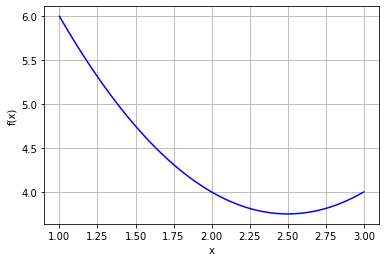

In [ ]:
xmin2, fmin2, err , iter= minGolden(f, 1, 3)  #calling the minGolden function with the default tol and maxit values
print('xmin by minGolden: x= ', xmin)
print('fmin by minGolden = ', fmin)
print('approximate error = ', err, '%')
print('number of iterations = ', iter)
# a plot of the function to check the results
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 3, 100)
y = f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid('true')

The minimum of the function is correctly calculated, compared with the analytical solution $x_t=2.5$ and consistent with the plot of the function.  The approximate error obtained is less the specified error tolerance and the number of iterations is less than its maximum values. These indicate that the function is terminated because the error stopping criterion is met. The minimum value of the function is also provided by the function.

The analytical solution of the root in this example is $x_t=2.5$ which can be used to calculate the true error:

In [ ]:
xt=2.5             # true value of the root
et=abs((xt-xmin)/xt)*100  # true error (%)
print('true value of the min. location: x= ' ,xt)
print('true error =  ' ,et, '%')

true value of the min. location: x=  2.5
true error =   1.0749810002153026e-05 %


This shows that the root is calculated quite accurately with the default error tolerance. For demonstration, let's make it less accurate by setting a larger error tolerance value.


### Example 2 
Find the maximum of the function $f(x)=-x^2+6x-8.5$ in the interval [2,4].

xmin by root finding =  3.0
fmin by root finding =  0.5
error =  0 %
number of iterations=  2
g'(xmin) =  -2 < 0, therefore, the optiminum point is a maximum.


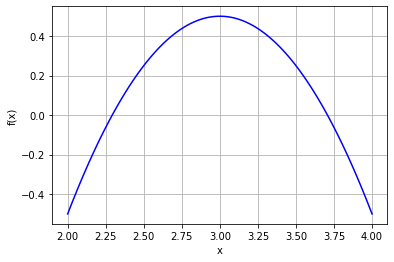

In [ ]:
# We can use any root finding function for optimization. Here we use Newtond-Raphson as an example.
f = lambda x: -x**2 + 6 * x - 8.5  #anonymous function definition
g = lambda x: -2 * x + 6           #anonymous function definition for g(x)=f'(x)
dg = lambda x: -2                  #anonymous function definition for g'(x)=f"(x)
xmin1, gmin, err , iter = newtonRaphson(g, dg, 2)  #calling the newtonRasphson function for g(x)=0
print('xmin by root finding = ', xmin1)
print('fmin by root finding = ', f(xmin1))
print('error = ', err, '%')
print('number of iterations= ', iter)
print('g\'(xmin) = ', dg(xmin1) ,'< 0, therefore, the optiminum point is a maximum.')

# plotting the function to check
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: -x**2 + 6 * x - 8.5  #anonymous function definition
x = np.linspace(2, 4, 100)
y = f(x)
yminus = -f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid('true')

To verify the calculations, we find the maximum using the `minGolden` function, (as done in the [`optimization-goldenSearch.ipynb`](https://https://colab.research.google.com/drive/1e9rQHNJGuxXb1ne9b8P0Yjd2nvwH07BQ?usp=sharing) Notebook):

In [ ]:
f = lambda x: -x**2 + 6 * x - 8.5  #anonymous function definition
fminus = lambda x: -f(x)
xmin, fminus_min, err , iter= minGolden(fminus, 1, 3)  #calling the minGolden function with the default tol and maxit values
xmax = xmin
fmax = -fminus_min
print('max. location: x= ', xmax)
print('max. of f(x)= ', fmax)
print('approximate error = ', err, '%')
print('number of iterations = ', iter)

max. location: x=  2.9999954463074108
max. of f(x)=  0.4999999999792646
approximate error =  9.381136888137594e-05 %
number of iterations =  26


The result are consistent with those obtained in Example 2.

# Exercise 1
Find the **minimum** location and value of $f(x)=2x+\frac{3}{x}$ in the [0.1 5] interval using a root finding method. Verify your answers by (a) by plotting the the function and (b) comparing the results with other optimization functions such as `fmin` and/or `minGolden`. [*Answer: $x_{min} = 1.2247$*]

# Exercise 2
Find the **maximum** location and value of $f(x)=-x^2+8x-11$ in the [2 10] interval using a root finding method. Verify your answers by (a) by plotting the the function and (b) comparing the results with other optimization functions such as `fmin` and/or `minGolden`. [*Answer: $f_{max} = 5$*]